In [1]:
import os
from pathlib import Path
container_check = os.getenv("iscontainer")
if container_check=="y":
    config_dir = Path("/home/vscode/.config/kaggle")
    config_dir.mkdir(parents=True, exist_ok=True)

    with open(config_dir / "kaggle.json", "w") as dst:
        with open("../kaggle.json", "r") as src:
            dst.write(src.read())

In [2]:
import os
import sys

sys.path.append(os.path.abspath(".."))

from ARISA_DSML.config import RAW_DATA_DIR, CSV_NAME, MODEL_NAME, target
from ARISA_DSML.preproc import get_raw_data

2025-05-09 20:54:44.329 | INFO     | ARISA_DSML.config:<module>:12 - PROJ_ROOT path is: C:\Users\Kinga\Documents\ARISA\MLOps-Final


In [3]:
from ARISA_DSML.helpers import get_active_branch_name, get_git_commit_hash

get_active_branch_name("..")  # need ".." because we are not in root
get_git_commit_hash()

'b795afdd6d80e445188d1ece6d2bc0ef96338cd6'

In [4]:
get_raw_data()
!dir "{RAW_DATA_DIR}"

2025-05-09 20:54:54.609 | INFO     | ARISA_DSML.preproc:get_raw_data:21 - Downloading dataset shahnawaj9/diabetes-database


Dataset URL: https://www.kaggle.com/datasets/shahnawaj9/diabetes-database


2025-05-09 20:54:55.343 | INFO     | ARISA_DSML.preproc:get_raw_data:24 - Download complete.


 Volume in drive C has no label.
 Volume Serial Number is A4CB-2127

 Directory of C:\Users\Kinga\Documents\ARISA\MLOps-Final\data\raw

09.05.2025  20:54    <DIR>          .
09.05.2025  20:54    <DIR>          ..
08.05.2025  21:26                 0 .gitkeep
09.05.2025  20:54            23�873 diabetes.csv
09.05.2025  20:54            23�290 diabetes_Dataset_cleaned.csv
               3 File(s)         47�163 bytes
               2 Dir(s)  176�790�491�136 bytes free


In [5]:
from ARISA_DSML.preproc import preprocess_df

train_path, test_path = preprocess_df(RAW_DATA_DIR / CSV_NAME)

2025-05-09 20:54:55.429 | INFO     | ARISA_DSML.preproc:preprocess_df:59 - Train saved as train.csv, Test saved as test.csv


In [6]:
import pandas as pd
df_train = pd.read_csv(train_path)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               614 non-null    int64  
 1   glucose                   614 non-null    int64  
 2   bloodpressure             614 non-null    int64  
 3   skinthickness             614 non-null    int64  
 4   insulin                   614 non-null    int64  
 5   bmi                       614 non-null    float64
 6   diabetespedigreefunction  614 non-null    float64
 7   age                       614 non-null    int64  
 8   outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [7]:
y_train = df_train.pop(target)
X_train = df_train

In [8]:
import mlflow
from ARISA_DSML.train import run_hyperopt, get_or_create_experiment

mlflow.set_tracking_uri(f"http://127.0.0.1:5000")

experiment_id = get_or_create_experiment("diabetes_hyperparam_tuning")
mlflow.set_experiment(experiment_id=experiment_id)
best_params_path = run_hyperopt(X_train, y_train)

C:\Users\Kinga\AppData\Roaming\Python\Python311\site-packages\mlflow\protos\service_pb2.py:11: UserWarning: google.protobuf.service module is deprecated. RPC implementations should provide code generator plugins which generate code specific to the RPC implementation. service.py will be removed in Jan 2025
  from google.protobuf import service as _service
2025-05-09 20:54:59.293 | INFO     | ARISA_DSML.train:run_hyperopt:71 - Best Parameters: {'depth': 4, 'learning_rate': 0.0517580228923669, 'iterations': 184, 'l2_leaf_reg': 0.07973165549227099, 'bagging_temperature': 0.15292750595871435, 'random_strength': 0.0002482703621761438}


In [9]:
import joblib
from ARISA_DSML.train import train_cv
params = joblib.load(best_params_path)
n_folds = 5
cv_output_path = train_cv(X_train, y_train, params, n=n_folds)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.6204620	test: 0.7073171	best: 0.7073171 (0)	total: 140ms	remaining: 25.7s
1:	learn: 0.6410256	test: 0.7160494	best: 0.7160494 (1)	total: 142ms	remaining: 12.9s
2:	learn: 0.6308725	test: 0.6842105	best: 0.7160494 (1)	total: 144ms	remaining: 8.66s
3:	learn: 0.6462585	test: 0.6666667	best: 0.7160494 (1)	total: 145ms	remaining: 6.53s
4:	learn: 0.6644951	test: 0.7012987	best: 0.7160494 (1)	total: 147ms	remaining: 5.26s
5:	learn: 0.6644295	test: 0.6666667	best: 0.7160494 (1)	total: 149ms	remaining: 4.41s
6:	learn: 0.6576271	test: 0.6666667	best: 0.7160494 (1)	total: 150ms	remaining: 3.8s
7:	learn: 0.6644068	test: 0.6575342	best: 0.7160494 (1)	total: 152ms	remaining: 3.34s
8:	learn: 0.6712329	test: 0.6575342	best: 0.7160494 (1)	total: 153ms	remaining: 2.98s
9:	learn: 0.6755853	test: 0.6756757	best: 0.7160494 (1)	total: 155ms	remaining: 2.7s
10:	learn: 0.6824324	test: 0.6575342	best: 0.7160494 (1)	total: 157ms	remaining: 2.46s
11:	learn: 0.6912752	test: 0.657

In [10]:
from ARISA_DSML.train import plot_error_scatter
cv_results = pd.read_csv(cv_output_path)
plot_error_scatter(
    df_plot=cv_results, 
    name="Mean F1 Score", 
    title="Cross-Validation (N=5) Mean F1 score with Error Bands",
    xtitle="Training Steps",
    ytitle="Performance Score",
    yaxis_range=[0.5, 1]
)

In [11]:
plot_error_scatter(
    cv_results,
    x="iterations",
    y="test-Logloss-mean",
    err="test-Logloss-std",
    name="Mean logloss",
    title="Cross-Validation (N=5) Mean Logloss with Error Bands",
    xtitle="Training Steps",
    ytitle="Logloss",
)

In [12]:
from ARISA_DSML.train import train
params = joblib.load(best_params_path)
experiment_id = get_or_create_experiment("diabetes_full_training")
mlflow.set_experiment(experiment_id=experiment_id)
cv_results = pd.read_csv(cv_output_path)
model_path, model_params_path = train(X_train, y_train, params, cv_results=cv_results)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6741855	total: 1.15ms	remaining: 211ms
50:	learn: 0.3927143	total: 41.8ms	remaining: 109ms
100:	learn: 0.3225161	total: 82.3ms	remaining: 67.6ms
150:	learn: 0.2752042	total: 123ms	remaining: 26.9ms
183:	learn: 0.2523998	total: 150ms	remaining: 0us


C:\Users\Kinga\AppData\Roaming\Python\Python311\site-packages\mlflow\types\utils.py:394: UserWarning:

Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.

Successfully registered model 'diabetes-bclass'.
2025/05/09 20:55:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: diabetes-bclass, version 1
Created version '1' 

In [13]:
df_test = pd.read_csv(test_path)

df_test.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0


In [14]:
y_test = df_test.pop(target)
X_test = df_test

C:\Users\Kinga\AppData\Local\Temp\ipykernel_9096\2097039018.py:6: FutureWarning:

``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.12.1/model-registry.html#migrating-from-stages

C:\Users\Kinga\AppData\Local\Temp\ipykernel_9096\2097039018.py:14: FutureWarning:

``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.12.1/model-registry.html#migrating-from-stages



2025/05/09 20:55:20 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


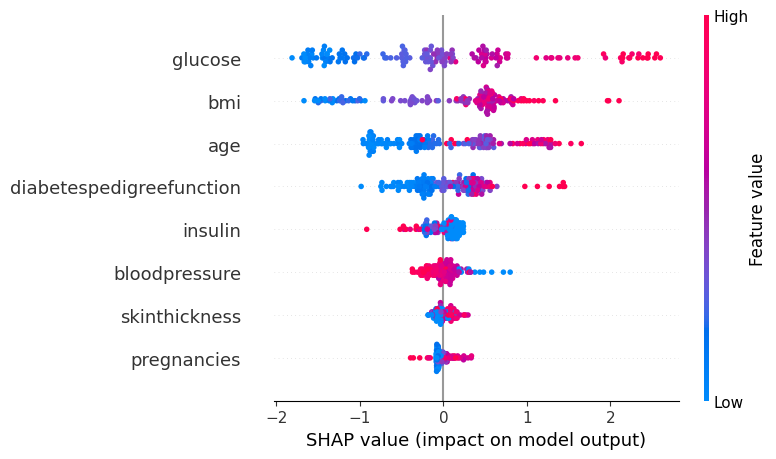

In [15]:
import json
from ARISA_DSML.predict import predict
from mlflow.client import MlflowClient

client = MlflowClient(mlflow.get_tracking_uri())
model_info = client.get_latest_versions(MODEL_NAME)[0]

# extract params/metrics data for run `test_run_id` in a single dict
run_data_dict = client.get_run(model_info.run_id).data.to_dictionary()
run = client.get_run(model_info.run_id)
log_model_meta = json.loads(run.data.tags['mlflow.log-model.history'])
log_model_meta[0]['signature']

latest_model = client.get_latest_versions(MODEL_NAME)

_, artifact_folder = os.path.split(latest_model[0].source)
model_uri = "runs:/{}/{}".format(latest_model[0].run_id, artifact_folder)
loaded_model = mlflow.catboost.load_model(model_uri)

params = run_data_dict["params"]
params["feature_columns"] = [inp["name"] for inp in json.loads(log_model_meta[0]['signature']['inputs'])]
preds_path = predict(loaded_model, df_test, params)

In [16]:
from ARISA_DSML.resolve import get_model_by_alias
client = MlflowClient(mlflow.get_tracking_uri())
champ_mv = get_model_by_alias(client)
chall_mv = get_model_by_alias(client, alias="challenger")

No champion model, predicting using newest model
runs:/bbe09a3b851944c0a03a9462f9fb9ea1/model


C:\Users\Kinga\AppData\Local\Temp\ipykernel_9096\2109093237.py:6: FutureWarning:

``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.12.1/model-registry.html#migrating-from-stages



2025/05/09 20:55:21 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


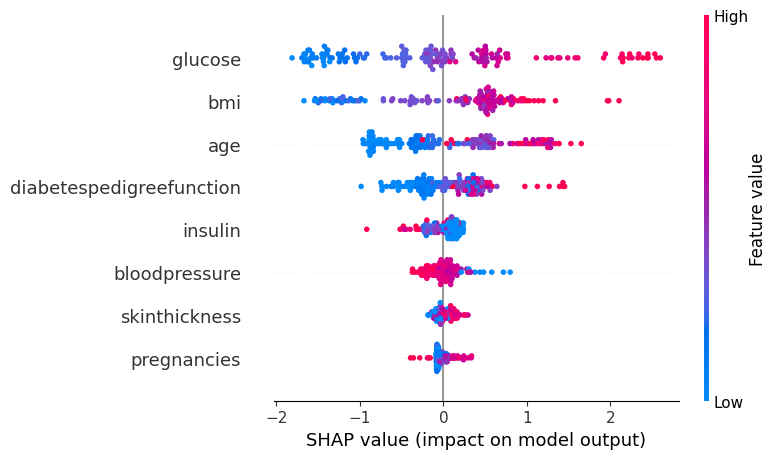

In [17]:
from ARISA_DSML.config import MODEL_NAME
client = MlflowClient(mlflow.get_tracking_uri())
model_info = get_model_by_alias(client, alias="champion")
if model_info is None:
    print("No champion model, predicting using newest model")
    model_info = client.get_latest_versions(MODEL_NAME)[0]

# extract params/metrics data for run `test_run_id` in a single dict 
run_data_dict = client.get_run(model_info.run_id).data.to_dictionary()
run = client.get_run(model_info.run_id)
log_model_meta = json.loads(run.data.tags['mlflow.log-model.history'])
log_model_meta[0]['signature']


_, artifact_folder = os.path.split(model_info.source)
model_uri = "runs:/{}/{}".format(model_info.run_id, artifact_folder)
print(model_uri)
loaded_model = mlflow.catboost.load_model(model_uri)

params = run_data_dict["params"]
params["feature_columns"] = [inp["name"] for inp in json.loads(log_model_meta[0]['signature']['inputs'])]
preds_path = predict(loaded_model, df_test, params)